In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso

In [3]:
car_dataset = pd.read_csv('/content/car data.csv')

In [4]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [5]:
car_dataset.tail()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
296,city,2016,9.50,11.6,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.9,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.0,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.5,9000,Diesel,Dealer,Manual,0
300,brio,2016,5.30,5.9,5464,Petrol,Dealer,Manual,0


In [6]:
car_dataset.shape

(301, 9)

In [8]:
car_dataset.isnull().sum()

,0
Car_Name,0
Year,0
Selling_Price,0
Present_Price,0
Kms_Driven,0
Fuel_Type,0
Seller_Type,0
Transmission,0
Owner,0


In [7]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [14]:
car_dataset['Fuel_Type'].value_counts()

,count
Fuel_Type,
Petrol,239
Diesel,60
CNG,2


In [13]:
car_dataset['Transmission'].value_counts()

,count
Transmission,
Manual,261
Automatic,40


In [12]:
car_dataset['Seller_Type'].value_counts()

,count
Seller_Type,
Dealer,195
Individual,106


In [17]:
car_dataset.replace({'Fuel_Type':{'Diesel':0,'Petrol':1,'CNG':2}},inplace = True)
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace = True)
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)

<ipython-input-17-1517046554>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace = True)


In [23]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,1,0,0,0
1,sx4,2013,4.75,9.54,43000,0,0,0,0
2,ciaz,2017,7.25,9.85,6900,1,0,0,0
3,wagon r,2011,2.85,4.15,5200,1,0,0,0
4,swift,2014,4.60,6.87,42450,0,0,0,0


In [20]:
X = car_dataset.drop(columns =['Car_Name','Selling_Price'],axis =1)
Y = car_dataset['Selling_Price']

In [21]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          1            0             0   
1    2013           9.54       43000          0            0             0   
2    2017           9.85        6900          1            0             0   
3    2011           4.15        5200          1            0             0   
4    2014           6.87       42450          0            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          0            0             0   
297  2015           5.90       60000          1            0             0   
298  2009          11.00       87934          1            0             0   
299  2017          12.50        9000          0            0             0   
300  2016           5.90        5464          1            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [22]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [26]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state =2)

In [27]:
print(X.shape,X_train.shape,X_test.shape)

(301, 7) (270, 7) (31, 7)


1.LinearRegression

In [25]:
model = LinearRegression()

In [28]:
model.fit(X_train,Y_train)

LinearRegression()

In [30]:
train_data_prediction = model.predict(X_train)
error_score  = metrics.r2_score(train_data_prediction,Y_train)

In [31]:
print('The trained data error score: ',error_score)

The trained data error score:  0.866806906529817


In [32]:
test_data_prediction = model.predict(X_test)
error_score = metrics.r2_score(test_data_prediction,Y_test)

In [33]:
print('The test data error score: ',error_score)

The test data error score:  0.8432084382219708


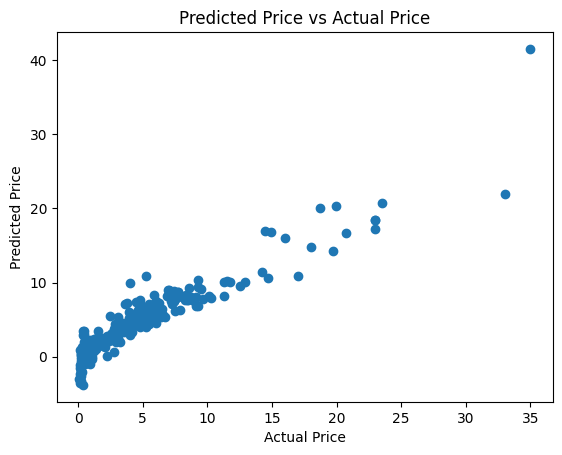

In [38]:
plt.scatter(Y_train,train_data_prediction)
plt.ylabel('Predicted Price')
plt.xlabel('Actual Price')
plt.title('Predicted Price vs Actual Price')
plt.show()

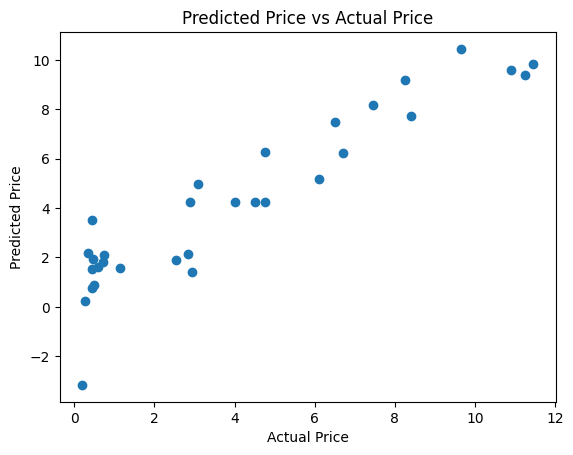

In [39]:
plt.scatter(Y_test,test_data_prediction)
plt.ylabel('Predicted Price')
plt.xlabel('Actual Price')
plt.title('Predicted Price vs Actual Price')
plt.show()

2.LassoRegression

In [40]:
classifier = Lasso()

In [42]:
classifier.fit(X_train,Y_train)

Lasso()

In [43]:
train_data_prediction = classifier.predict(X_train)
error_score  = metrics.r2_score(train_data_prediction,Y_train)

In [44]:
print('The trained data error score: ',error_score)

The trained data error score:  0.798459024070425


In [45]:
test_data_prediction = model.predict(X_test)
error_score = metrics.r2_score(test_data_prediction,Y_test)

In [46]:
print('The test data error score: ',error_score)

The test data error score:  0.8432084382219708


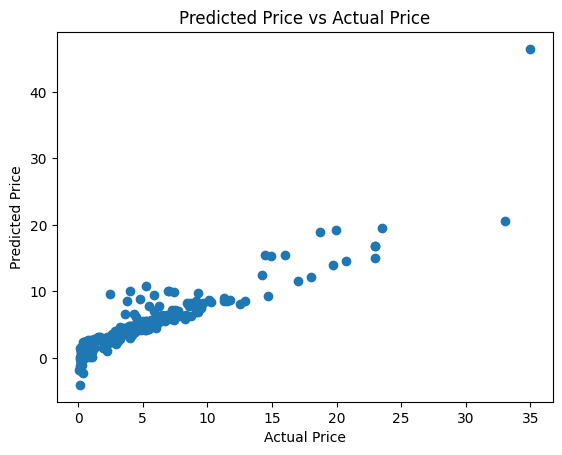

In [47]:
plt.scatter(Y_train,train_data_prediction)
plt.ylabel('Predicted Price')
plt.xlabel('Actual Price')
plt.title('Predicted Price vs Actual Price')
plt.show()

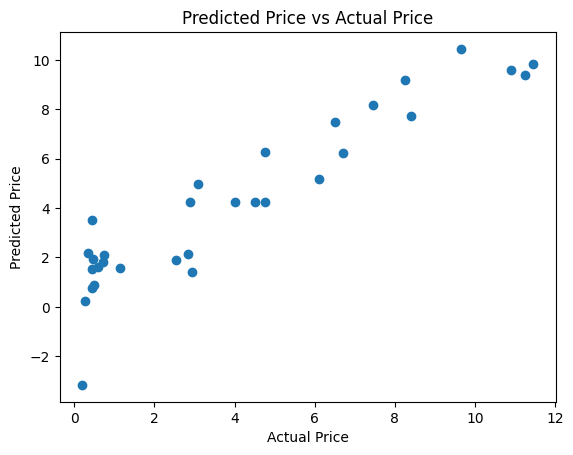

In [48]:
plt.scatter(Y_test,test_data_prediction)
plt.ylabel('Predicted Price')
plt.xlabel('Actual Price')
plt.title('Predicted Price vs Actual Price')
plt.show()